In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('heart.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
df.duplicated().sum()

0

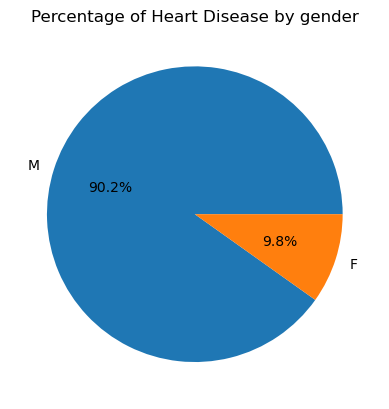

In [7]:
# Lets check the gender wise heart attack rate
plt.pie(x=df[df['HeartDisease']==1]['Sex'].value_counts(),labels=['M','F'],autopct='%1.1f%%')
plt.title('Percentage of Heart Disease by gender')
plt.show()

### Clearly our dataset is imbalanced , we will cater it at the end using SMOTE

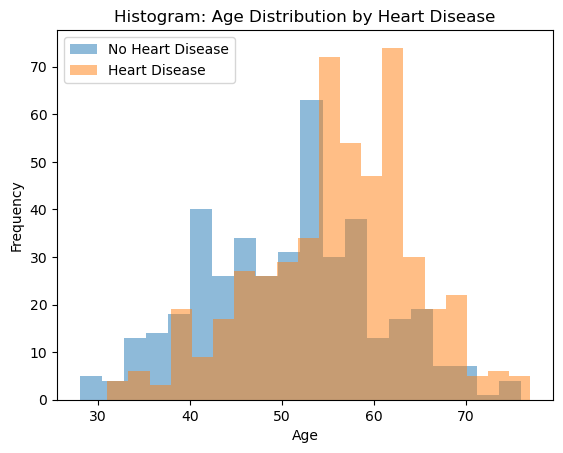

In [8]:
plt.hist(df[df['HeartDisease'] == 0]['Age'], alpha=0.5, label='No Heart Disease', bins=20)
plt.hist(df[df['HeartDisease'] == 1]['Age'], alpha=0.5, label='Heart Disease', bins=20)

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram: Age Distribution by Heart Disease')
plt.legend()
plt.show()

### We can observe that from almost age 40 to 55 people have heart disease

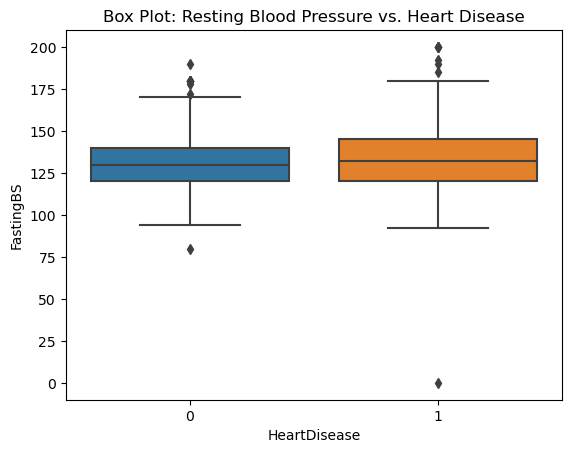

In [9]:
sns.boxplot(x='HeartDisease', y='RestingBP', data=df)
plt.xlabel('HeartDisease')
plt.ylabel('FastingBS')
plt.title('Box Plot: Resting Blood Pressure vs. Heart Disease')
plt.show()

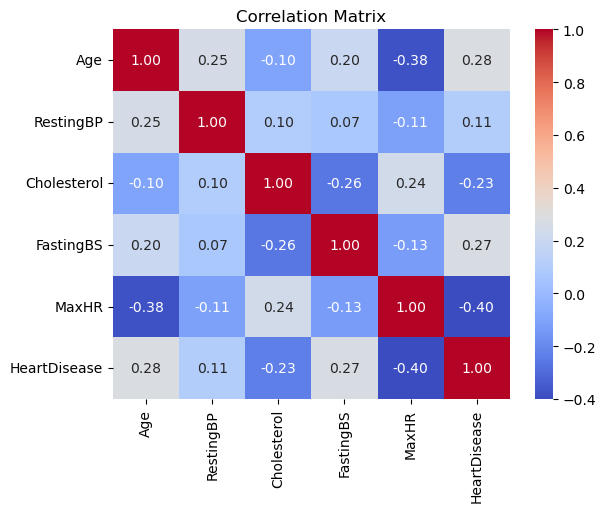

In [10]:
correlation_matrix = df[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'HeartDisease']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


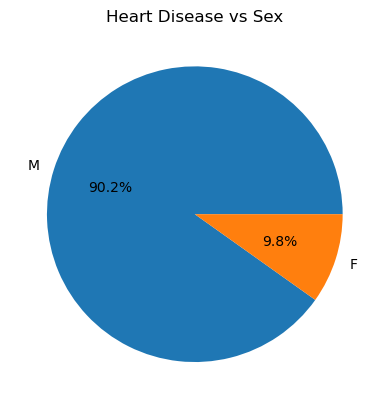

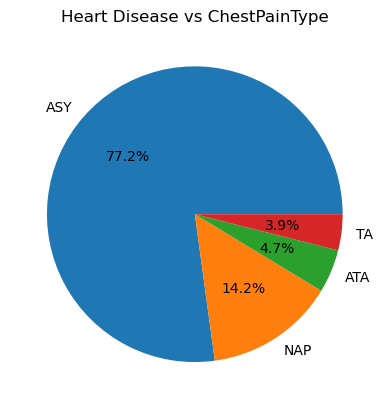

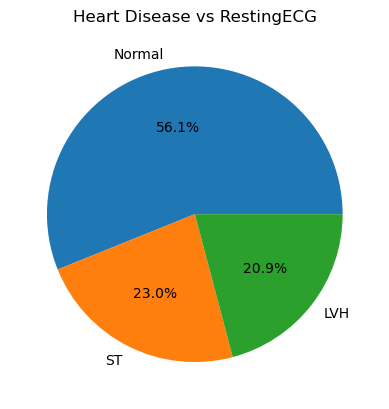

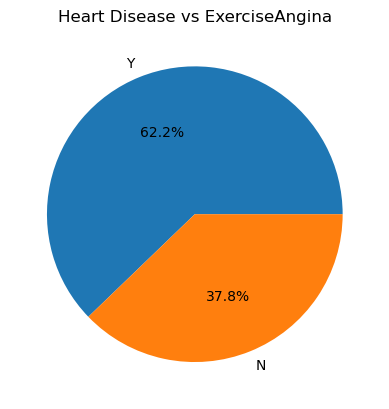

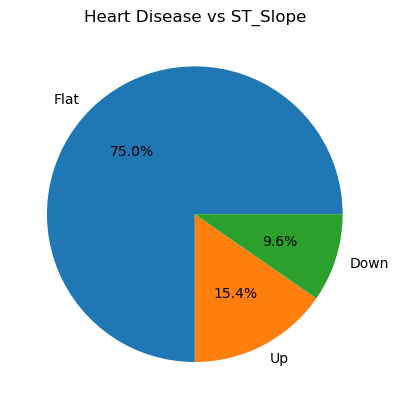

In [12]:
object_cols=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
for obj in object_cols:
  # Lets check the gender wise heart attack rate
  plt.pie(x=df[df['HeartDisease']==1][obj].value_counts(),labels=df[df['HeartDisease']==1][obj].value_counts().index,autopct='%1.1f%%')
  plt.title(f'Heart Disease vs {obj}')
  plt.show()

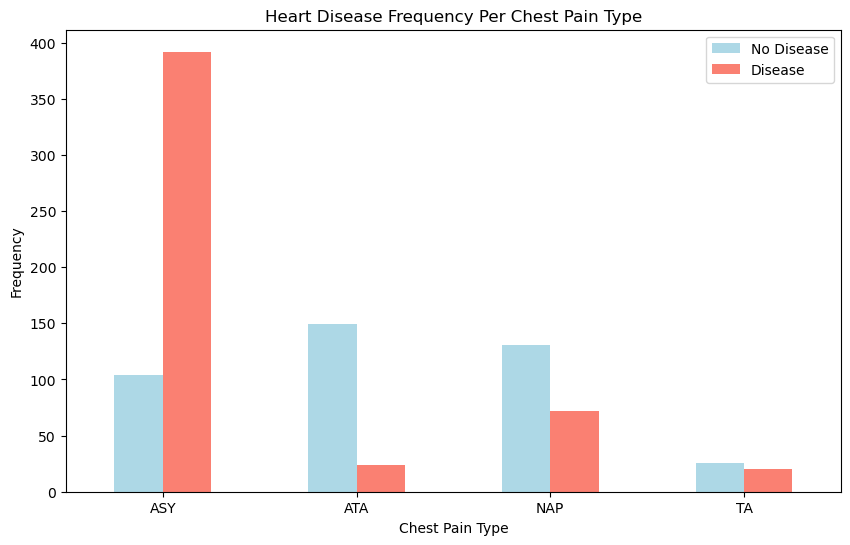

In [16]:
# Visualizing
pd.crosstab(df['ChestPainType'], df['HeartDisease']).plot(kind="bar", 
                                   figsize=(10,6), 
                                   color=["lightblue", "salmon"])

plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);